# (Dataset  Title here) IMDd-Movie-Database
## by (your name here) Mohamed Ahmed Mahmoud Abd Elwahab

> Briefly introduce dataset here.
>> This DataSet Show The Most Moveis And Its Score , Famous Actor , Director , Duration , Language , Its Rating And The Country Of Each Movie So We Need To Process This Data To Show The Trend Movie And Understranding This Data Well 



```
# import libraries
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

```
#import your dataset 
```

In [2]:
df_IMDd = pd.read_csv("IMDd-Movie-Database.csv")

In [3]:
df_IMDd.head()

,Title,Release Date,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
0,Over the Hill to the Poorhouse,15-09-1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
1,Metropolis,26-01-1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000
2,The Broadway Melody,11-11-1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000
3,42nd Street,29-08-1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000
4,Top Hat,15-04-1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000


In [4]:
df_IMDd.columns

Index(['Title', 'Release Date', 'Color/B&W', 'Genre', 'Language', 'Country',
       'Rating', 'Lead Actor', 'Director Name', 'Lead Actor FB Likes',
       'Cast FB Likes', 'Director FB Likes', 'Movie FB Likes',
       'IMDb Score (1-10)', 'Total Reviews', 'Duration (min)', 'Gross Revenue',
       'Budget'],
      dtype='object')

In [5]:
# I will Rename Some Columns Because I Can Call It Esaily
df_IMDd.rename(columns={'Color/B&W':"Color", 'IMDb Score (1-10)':"Score", 'Duration (min)':"Duration"}, inplace=True)
df_IMDd.columns

Index(['Title', 'Release Date', 'Color', 'Genre', 'Language', 'Country',
       'Rating', 'Lead Actor', 'Director Name', 'Lead Actor FB Likes',
       'Cast FB Likes', 'Director FB Likes', 'Movie FB Likes', 'Score',
       'Total Reviews', 'Duration', 'Gross Revenue', 'Budget'],
      dtype='object')

**Find the mean, median, standard deviation**

In [6]:
#Mean Of Score 
df_IMDd["Score"].mean()

6.463731543624164

In [7]:
#Median Of Score
df_IMDd["Score"].median()

6.6

In [8]:
#Standard Deviation Of Score
df_IMDd["Score"].std()

1.058897919720656

**Create a normalized form whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.**

In [9]:
#As Like I Search The Equation is normalized_df=(df-df.min())/(df.max()-df.min())
#So I Will Make A New Column Z_Score Have Normalized Values between 0 And 1 In Score Column
df_IMDd["Z_Score"] = (df_IMDd["Score"] - df_IMDd["Score"].min()) / (df_IMDd["Score"].max() - df_IMDd["Score"].min())

In [10]:
#Test The Equation Do Its Work Right
df_IMDd["Z_Score"].max()

1.0

In [11]:
df_IMDd["Z_Score"].min()

0.0

In [12]:
df_IMDd.head()

,Title,Release Date,Color,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,Score,Total Reviews,Duration,Gross Revenue,Budget,Z_Score
0,Over the Hill to the Poorhouse,15-09-1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000,0.415584
1,Metropolis,26-01-1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000,0.870130
2,The Broadway Melody,11-11-1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000,0.610390
3,42nd Street,29-08-1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000,0.792208
4,Top Hat,15-04-1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000,0.805195


**Compute the softmax score**

In [13]:
#I Search And Found That The Function Of SoftMax Score Is np.exp(x)/sum(np.exp(x))
#So I Will Use Numpy And exp Function To Make New Column In  Dataset Name --> Softmax_Score
df_IMDd["Softmax_Score"] = np.exp(df_IMDd.Score) / sum(np.exp(df_IMDd.Score))
df_IMDd["Softmax_Score"].head()

0    0.000032
1    0.001063
2    0.000144
3    0.000584
4    0.000645
Name: Softmax_Score, dtype: float64

**Find the number and position of missing values**

In [14]:
#Total NaN In DataSet
df_IMDd.isnull().sum().sum()

59

In [15]:
#Total NaN In Each Column
df_IMDd.isnull().sum()

Title                   0
Release Date            0
Color                   0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
Score                   0
Total Reviews           1
Duration                1
Gross Revenue           0
Budget                  0
Z_Score                 0
Softmax_Score           0
dtype: int64

In [16]:
#Total NaN In Each Row 
for i in range(len(df_IMDd.index)) : 
    print(" Total NaN in row", i + 1, ":", 
          df_IMDd.iloc[i].isnull().sum())

 Total NaN in row 1 : 0
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 0
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 0
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 0
 Total NaN in row 13 : 0
 Total NaN in row 14 : 0
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 0
 Total NaN in row 18 : 0
 Total NaN in row 19 : 0
 Total NaN in row 20 : 0
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 0
 Total NaN in row 24 : 0
 Total NaN in row 25 : 0
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 0
 Total NaN in row 31 : 0
 Total NaN in row 32 : 0
 Total NaN in row 33 : 0
 Total NaN in row 34 : 0
 Total NaN in row 35 : 0
 Total NaN in row 36 : 0
 Total NaN in row 37 : 0
 Total NaN in row 38 : 0
 Total NaN in row 39 : 0
 Total NaN in row 40 : 0
 Total Na

 Total NaN in row 381 : 0
 Total NaN in row 382 : 0
 Total NaN in row 383 : 0
 Total NaN in row 384 : 0
 Total NaN in row 385 : 0
 Total NaN in row 386 : 0
 Total NaN in row 387 : 0
 Total NaN in row 388 : 0
 Total NaN in row 389 : 0
 Total NaN in row 390 : 0
 Total NaN in row 391 : 0
 Total NaN in row 392 : 0
 Total NaN in row 393 : 0
 Total NaN in row 394 : 0
 Total NaN in row 395 : 0
 Total NaN in row 396 : 0
 Total NaN in row 397 : 0
 Total NaN in row 398 : 0
 Total NaN in row 399 : 0
 Total NaN in row 400 : 0
 Total NaN in row 401 : 0
 Total NaN in row 402 : 0
 Total NaN in row 403 : 0
 Total NaN in row 404 : 0
 Total NaN in row 405 : 0
 Total NaN in row 406 : 0
 Total NaN in row 407 : 0
 Total NaN in row 408 : 0
 Total NaN in row 409 : 1
 Total NaN in row 410 : 0
 Total NaN in row 411 : 0
 Total NaN in row 412 : 0
 Total NaN in row 413 : 0
 Total NaN in row 414 : 0
 Total NaN in row 415 : 0
 Total NaN in row 416 : 0
 Total NaN in row 417 : 0
 Total NaN in row 418 : 0
 Total NaN i

 Total NaN in row 815 : 0
 Total NaN in row 816 : 0
 Total NaN in row 817 : 0
 Total NaN in row 818 : 0
 Total NaN in row 819 : 0
 Total NaN in row 820 : 0
 Total NaN in row 821 : 0
 Total NaN in row 822 : 0
 Total NaN in row 823 : 0
 Total NaN in row 824 : 0
 Total NaN in row 825 : 0
 Total NaN in row 826 : 0
 Total NaN in row 827 : 0
 Total NaN in row 828 : 0
 Total NaN in row 829 : 0
 Total NaN in row 830 : 0
 Total NaN in row 831 : 0
 Total NaN in row 832 : 0
 Total NaN in row 833 : 0
 Total NaN in row 834 : 0
 Total NaN in row 835 : 0
 Total NaN in row 836 : 0
 Total NaN in row 837 : 0
 Total NaN in row 838 : 0
 Total NaN in row 839 : 0
 Total NaN in row 840 : 0
 Total NaN in row 841 : 0
 Total NaN in row 842 : 0
 Total NaN in row 843 : 0
 Total NaN in row 844 : 0
 Total NaN in row 845 : 0
 Total NaN in row 846 : 0
 Total NaN in row 847 : 0
 Total NaN in row 848 : 0
 Total NaN in row 849 : 0
 Total NaN in row 850 : 0
 Total NaN in row 851 : 0
 Total NaN in row 852 : 0
 Total NaN i

 Total NaN in row 1165 : 0
 Total NaN in row 1166 : 0
 Total NaN in row 1167 : 0
 Total NaN in row 1168 : 0
 Total NaN in row 1169 : 0
 Total NaN in row 1170 : 0
 Total NaN in row 1171 : 0
 Total NaN in row 1172 : 0
 Total NaN in row 1173 : 0
 Total NaN in row 1174 : 0
 Total NaN in row 1175 : 0
 Total NaN in row 1176 : 0
 Total NaN in row 1177 : 0
 Total NaN in row 1178 : 0
 Total NaN in row 1179 : 0
 Total NaN in row 1180 : 0
 Total NaN in row 1181 : 0
 Total NaN in row 1182 : 0
 Total NaN in row 1183 : 0
 Total NaN in row 1184 : 0
 Total NaN in row 1185 : 0
 Total NaN in row 1186 : 0
 Total NaN in row 1187 : 0
 Total NaN in row 1188 : 0
 Total NaN in row 1189 : 0
 Total NaN in row 1190 : 0
 Total NaN in row 1191 : 0
 Total NaN in row 1192 : 0
 Total NaN in row 1193 : 0
 Total NaN in row 1194 : 0
 Total NaN in row 1195 : 0
 Total NaN in row 1196 : 0
 Total NaN in row 1197 : 0
 Total NaN in row 1198 : 0
 Total NaN in row 1199 : 0
 Total NaN in row 1200 : 0
 Total NaN in row 1201 : 0
 

 Total NaN in row 1588 : 0
 Total NaN in row 1589 : 0
 Total NaN in row 1590 : 0
 Total NaN in row 1591 : 0
 Total NaN in row 1592 : 0
 Total NaN in row 1593 : 0
 Total NaN in row 1594 : 0
 Total NaN in row 1595 : 0
 Total NaN in row 1596 : 0
 Total NaN in row 1597 : 0
 Total NaN in row 1598 : 0
 Total NaN in row 1599 : 0
 Total NaN in row 1600 : 0
 Total NaN in row 1601 : 0
 Total NaN in row 1602 : 0
 Total NaN in row 1603 : 0
 Total NaN in row 1604 : 1
 Total NaN in row 1605 : 0
 Total NaN in row 1606 : 0
 Total NaN in row 1607 : 0
 Total NaN in row 1608 : 0
 Total NaN in row 1609 : 0
 Total NaN in row 1610 : 0
 Total NaN in row 1611 : 0
 Total NaN in row 1612 : 0
 Total NaN in row 1613 : 0
 Total NaN in row 1614 : 0
 Total NaN in row 1615 : 0
 Total NaN in row 1616 : 0
 Total NaN in row 1617 : 0
 Total NaN in row 1618 : 0
 Total NaN in row 1619 : 0
 Total NaN in row 1620 : 0
 Total NaN in row 1621 : 0
 Total NaN in row 1622 : 0
 Total NaN in row 1623 : 0
 Total NaN in row 1624 : 0
 

 Total NaN in row 1892 : 0
 Total NaN in row 1893 : 0
 Total NaN in row 1894 : 0
 Total NaN in row 1895 : 0
 Total NaN in row 1896 : 0
 Total NaN in row 1897 : 0
 Total NaN in row 1898 : 0
 Total NaN in row 1899 : 0
 Total NaN in row 1900 : 0
 Total NaN in row 1901 : 0
 Total NaN in row 1902 : 0
 Total NaN in row 1903 : 0
 Total NaN in row 1904 : 0
 Total NaN in row 1905 : 0
 Total NaN in row 1906 : 0
 Total NaN in row 1907 : 0
 Total NaN in row 1908 : 0
 Total NaN in row 1909 : 0
 Total NaN in row 1910 : 0
 Total NaN in row 1911 : 0
 Total NaN in row 1912 : 1
 Total NaN in row 1913 : 0
 Total NaN in row 1914 : 0
 Total NaN in row 1915 : 0
 Total NaN in row 1916 : 0
 Total NaN in row 1917 : 0
 Total NaN in row 1918 : 0
 Total NaN in row 1919 : 0
 Total NaN in row 1920 : 0
 Total NaN in row 1921 : 0
 Total NaN in row 1922 : 0
 Total NaN in row 1923 : 0
 Total NaN in row 1924 : 2
 Total NaN in row 1925 : 0
 Total NaN in row 1926 : 0
 Total NaN in row 1927 : 0
 Total NaN in row 1928 : 0
 

 Total NaN in row 2215 : 0
 Total NaN in row 2216 : 0
 Total NaN in row 2217 : 0
 Total NaN in row 2218 : 0
 Total NaN in row 2219 : 0
 Total NaN in row 2220 : 0
 Total NaN in row 2221 : 0
 Total NaN in row 2222 : 0
 Total NaN in row 2223 : 0
 Total NaN in row 2224 : 0
 Total NaN in row 2225 : 0
 Total NaN in row 2226 : 0
 Total NaN in row 2227 : 0
 Total NaN in row 2228 : 0
 Total NaN in row 2229 : 0
 Total NaN in row 2230 : 0
 Total NaN in row 2231 : 0
 Total NaN in row 2232 : 0
 Total NaN in row 2233 : 0
 Total NaN in row 2234 : 0
 Total NaN in row 2235 : 0
 Total NaN in row 2236 : 0
 Total NaN in row 2237 : 0
 Total NaN in row 2238 : 0
 Total NaN in row 2239 : 0
 Total NaN in row 2240 : 0
 Total NaN in row 2241 : 0
 Total NaN in row 2242 : 0
 Total NaN in row 2243 : 0
 Total NaN in row 2244 : 0
 Total NaN in row 2245 : 0
 Total NaN in row 2246 : 0
 Total NaN in row 2247 : 0
 Total NaN in row 2248 : 0
 Total NaN in row 2249 : 0
 Total NaN in row 2250 : 0
 Total NaN in row 2251 : 0
 

 Total NaN in row 2531 : 0
 Total NaN in row 2532 : 0
 Total NaN in row 2533 : 0
 Total NaN in row 2534 : 0
 Total NaN in row 2535 : 0
 Total NaN in row 2536 : 0
 Total NaN in row 2537 : 0
 Total NaN in row 2538 : 0
 Total NaN in row 2539 : 0
 Total NaN in row 2540 : 0
 Total NaN in row 2541 : 0
 Total NaN in row 2542 : 0
 Total NaN in row 2543 : 0
 Total NaN in row 2544 : 0
 Total NaN in row 2545 : 0
 Total NaN in row 2546 : 0
 Total NaN in row 2547 : 0
 Total NaN in row 2548 : 0
 Total NaN in row 2549 : 0
 Total NaN in row 2550 : 0
 Total NaN in row 2551 : 0
 Total NaN in row 2552 : 0
 Total NaN in row 2553 : 0
 Total NaN in row 2554 : 0
 Total NaN in row 2555 : 0
 Total NaN in row 2556 : 0
 Total NaN in row 2557 : 0
 Total NaN in row 2558 : 0
 Total NaN in row 2559 : 0
 Total NaN in row 2560 : 0
 Total NaN in row 2561 : 0
 Total NaN in row 2562 : 0
 Total NaN in row 2563 : 0
 Total NaN in row 2564 : 0
 Total NaN in row 2565 : 0
 Total NaN in row 2566 : 0
 Total NaN in row 2567 : 0
 

 Total NaN in row 2839 : 0
 Total NaN in row 2840 : 1
 Total NaN in row 2841 : 0
 Total NaN in row 2842 : 0
 Total NaN in row 2843 : 0
 Total NaN in row 2844 : 0
 Total NaN in row 2845 : 0
 Total NaN in row 2846 : 0
 Total NaN in row 2847 : 0
 Total NaN in row 2848 : 0
 Total NaN in row 2849 : 0
 Total NaN in row 2850 : 0
 Total NaN in row 2851 : 0
 Total NaN in row 2852 : 0
 Total NaN in row 2853 : 0
 Total NaN in row 2854 : 0
 Total NaN in row 2855 : 0
 Total NaN in row 2856 : 0
 Total NaN in row 2857 : 0
 Total NaN in row 2858 : 0
 Total NaN in row 2859 : 0
 Total NaN in row 2860 : 0
 Total NaN in row 2861 : 0
 Total NaN in row 2862 : 0
 Total NaN in row 2863 : 0
 Total NaN in row 2864 : 0
 Total NaN in row 2865 : 0
 Total NaN in row 2866 : 0
 Total NaN in row 2867 : 0
 Total NaN in row 2868 : 0
 Total NaN in row 2869 : 0
 Total NaN in row 2870 : 0
 Total NaN in row 2871 : 0
 Total NaN in row 2872 : 0
 Total NaN in row 2873 : 0
 Total NaN in row 2874 : 0
 Total NaN in row 2875 : 0
 

 Total NaN in row 3213 : 0
 Total NaN in row 3214 : 0
 Total NaN in row 3215 : 0
 Total NaN in row 3216 : 0
 Total NaN in row 3217 : 0
 Total NaN in row 3218 : 0
 Total NaN in row 3219 : 0
 Total NaN in row 3220 : 0
 Total NaN in row 3221 : 0
 Total NaN in row 3222 : 0
 Total NaN in row 3223 : 0
 Total NaN in row 3224 : 0
 Total NaN in row 3225 : 0
 Total NaN in row 3226 : 0
 Total NaN in row 3227 : 0
 Total NaN in row 3228 : 0
 Total NaN in row 3229 : 0
 Total NaN in row 3230 : 0
 Total NaN in row 3231 : 0
 Total NaN in row 3232 : 0
 Total NaN in row 3233 : 0
 Total NaN in row 3234 : 0
 Total NaN in row 3235 : 0
 Total NaN in row 3236 : 0
 Total NaN in row 3237 : 0
 Total NaN in row 3238 : 0
 Total NaN in row 3239 : 0
 Total NaN in row 3240 : 0
 Total NaN in row 3241 : 0
 Total NaN in row 3242 : 0
 Total NaN in row 3243 : 0
 Total NaN in row 3244 : 0
 Total NaN in row 3245 : 0
 Total NaN in row 3246 : 0
 Total NaN in row 3247 : 0
 Total NaN in row 3248 : 0
 Total NaN in row 3249 : 0
 

 Total NaN in row 3588 : 0
 Total NaN in row 3589 : 0
 Total NaN in row 3590 : 0
 Total NaN in row 3591 : 0
 Total NaN in row 3592 : 0
 Total NaN in row 3593 : 0
 Total NaN in row 3594 : 0
 Total NaN in row 3595 : 0
 Total NaN in row 3596 : 0
 Total NaN in row 3597 : 0
 Total NaN in row 3598 : 0
 Total NaN in row 3599 : 0
 Total NaN in row 3600 : 0
 Total NaN in row 3601 : 0
 Total NaN in row 3602 : 0
 Total NaN in row 3603 : 0
 Total NaN in row 3604 : 1
 Total NaN in row 3605 : 0
 Total NaN in row 3606 : 0
 Total NaN in row 3607 : 1
 Total NaN in row 3608 : 0
 Total NaN in row 3609 : 0
 Total NaN in row 3610 : 0
 Total NaN in row 3611 : 0
 Total NaN in row 3612 : 0
 Total NaN in row 3613 : 0
 Total NaN in row 3614 : 0
 Total NaN in row 3615 : 0
 Total NaN in row 3616 : 1
 Total NaN in row 3617 : 0
 Total NaN in row 3618 : 0
 Total NaN in row 3619 : 0
 Total NaN in row 3620 : 0
 Total NaN in row 3621 : 0
 Total NaN in row 3622 : 0
 Total NaN in row 3623 : 0
 Total NaN in row 3624 : 0
 

In [17]:
#Only Row That Has NaN Value
for i in range(len(df_IMDd.index)) : 
    if df_IMDd.iloc[i].isnull().sum()!=0:
        print(" Total NaN in row", i + 1, ":", 
          df_IMDd.iloc[i].isnull().sum())

 Total NaN in row 317 : 1
 Total NaN in row 409 : 1
 Total NaN in row 518 : 1
 Total NaN in row 727 : 1
 Total NaN in row 744 : 1
 Total NaN in row 746 : 1
 Total NaN in row 794 : 1
 Total NaN in row 805 : 1
 Total NaN in row 881 : 1
 Total NaN in row 1024 : 1
 Total NaN in row 1040 : 1
 Total NaN in row 1080 : 1
 Total NaN in row 1203 : 1
 Total NaN in row 1214 : 3
 Total NaN in row 1423 : 1
 Total NaN in row 1516 : 1
 Total NaN in row 1604 : 1
 Total NaN in row 1703 : 1
 Total NaN in row 1727 : 1
 Total NaN in row 1751 : 1
 Total NaN in row 1880 : 1
 Total NaN in row 1912 : 1
 Total NaN in row 1924 : 2
 Total NaN in row 1987 : 1
 Total NaN in row 2159 : 1
 Total NaN in row 2254 : 1
 Total NaN in row 2275 : 1
 Total NaN in row 2287 : 1
 Total NaN in row 2344 : 1
 Total NaN in row 2363 : 1
 Total NaN in row 2374 : 1
 Total NaN in row 2443 : 1
 Total NaN in row 2625 : 1
 Total NaN in row 2703 : 1
 Total NaN in row 2718 : 1
 Total NaN in row 2750 : 1
 Total NaN in row 2840 : 1
 Total NaN

**Select the rows that does not have any value**

In [18]:
#Total Row That Dose Not Have Any Value 
##### Important ######
#We Have 19 Column So In My Condition I Will Search For Row That Have 19 NaN If I Found This Row So That Row Dose Not Have Any Value ;) 
for i in range(len(df_IMDd.index)) : 
    if df_IMDd.iloc[i].isnull().sum()==19:
        print(" Total NaN in row", i + 1, ":", 
          df_IMDd.iloc[i].isnull().sum())

In [19]:
# I Do Not Found Any Row That Dose Not Have Any Value 
# Dataset Dose Not Have Row With No Any Value
# If We Want To Make Sure 
df_IMDd.isnull().sum()

Title                   0
Release Date            0
Color                   0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
Score                   0
Total Reviews           1
Duration                1
Gross Revenue           0
Budget                  0
Z_Score                 0
Softmax_Score           0
dtype: int64

In [20]:
#Only Rating , Total Reviews and Duration Have Missing Value 
# Max Of NaN Value In Column Rating And Has 49 Missing Value And We Have 3725 Row
#So Found Row With No Any Value Is Defucalt ;)
df_IMDd.shape

(3725, 20)

**Find the unique values and the count of unique values**

In [21]:
#Unique Value In Genre Column
df_IMDd.Genre.unique()

array(['Crime', 'Drama', 'Musical', 'Comedy', 'Animation', 'Adventure',
       'Biography', 'Action', 'Horror', 'Western', 'Documentary',
       'Mystery', 'Fantasy', 'Sci-Fi', 'Family', 'Thriller', 'Romance'],
      dtype=object)

In [22]:
#Count Of Unique Value In Genre Column
df_IMDd.Genre.nunique()

17

**Find the most frequent value of dataset**

In [23]:
#Most Frequent Value In Genre Column
df_IMDd.Genre.mode()

0    Comedy
dtype: object

In [24]:
#Most Frequent Value In Lead Actor Column
df_IMDd["Lead Actor"].mode()
#Robert De Niro Has Many Of Movies 

0    Robert De Niro
dtype: object

In [25]:
df_IMDd["Director Name"].mode()

0    Steven Spielberg
dtype: object

In [26]:
df_IMDd.groupby(["Title"])["Score"].max()

Title
10 Days in a Madhouse                 7.5
10 Things I Hate About You            7.2
102 Dalmatians                        4.8
10th & Wolf                           6.4
12 Rounds                             5.6
12 Years a Slave                      8.1
127 Hours                             7.6
13 Going on 30                        6.1
1408                                  6.8
15 Minutes                            6.1
16 Blocks                             6.6
17 Again                              6.4
1911                                  6.0
2 Fast 2 Furious                      5.9
2 Guns                                6.7
20 Dates                              5.3
20 Feet from Stardom                  7.4
200 Cigarettes                        5.9
2001: A Space Odyssey                 8.3
2012                                  5.8
2016: Obama's America                 5.1
2046                                  7.5
21                                    6.8
21 & Over                   

In [27]:
df_IMDd.groupby(["Total Reviews"])["Title"].max()

Total Reviews
1.0                                The Knife of Don Juan
2.0                                               Sphinx
3.0                        Valley of the Heart's Delight
4.0             The Work and the Glory II: American Zion
5.0                                   There Goes My Baby
6.0                                       Time to Choose
7.0      The Book of Mormon Movie, Volume 1: The Journey
8.0                           The Sticky Fingers of Time
9.0                                       The Jimmy Show
10.0                                          White Fang
11.0                                 Troop Beverly Hills
12.0                   The Last Time I Committed Suicide
13.0                                   Under the Rainbow
14.0                                           The Salon
15.0                                    The Perez Family
16.0                                               Yentl
17.0                                  The Slaughter Rule
18.0             

In [28]:
df_IMDd[df_IMDd["Lead Actor"] == "Robert De Niro"].count()

Title                  41
Release Date           41
Color                  41
Genre                  41
Language               41
Country                41
Rating                 41
Lead Actor             41
Director Name          41
Lead Actor FB Likes    41
Cast FB Likes          41
Director FB Likes      41
Movie FB Likes         41
Score                  41
Total Reviews          41
Duration               41
Gross Revenue          41
Budget                 41
Z_Score                41
Softmax_Score          41
dtype: int64

In [29]:
df_IMDd[df_IMDd["Genre"] == "Comedy"].count()

Title                  1016
Release Date           1016
Color                  1016
Genre                  1016
Language               1016
Country                1016
Rating                  998
Lead Actor             1016
Director Name          1016
Lead Actor FB Likes    1016
Cast FB Likes          1016
Director FB Likes      1016
Movie FB Likes         1016
Score                  1016
Total Reviews          1016
Duration               1016
Gross Revenue          1016
Budget                 1016
Z_Score                1016
Softmax_Score          1016
dtype: int64

In [30]:
df_IMDd[df_IMDd["Director Name"] == "Steven Spielberg"].count()

Title                  24
Release Date           24
Color                  24
Genre                  24
Language               24
Country                24
Rating                 24
Lead Actor             24
Director Name          24
Lead Actor FB Likes    24
Cast FB Likes          24
Director FB Likes      24
Movie FB Likes         24
Score                  24
Total Reviews          24
Duration               24
Gross Revenue          24
Budget                 24
Z_Score                24
Softmax_Score          24
dtype: int64

> Write the structure  of your dataset here 
>> Our DataSet Has 20 Columns And 3725 Row 
>> The Mean Of Score Is 6.46
>> The Most Famous Actor Is Robert De Niro 
>> The Most Genre In Dataset Is Comedy Movies
>> The Column (Title) Has Unique Values
>> The ShawShank Redemption Movie Has The Greatest Value Of Score
>> The Dark Knight Rises Movie Has The Greatest Reviews

----

# Type of data analysis
## Univariate
> is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.

>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

## Bivariate
>In statistics, bivariate data is data on each of two variables, where each value of one of the variables is paired with a value of the other variable. Typically it would be of interest to investigate the possible association between the two variables.

>Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Multivariate
>Multivariate statistics is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. The application of multivariate statistics is multivariate analysis.

>Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

![picture](https://drive.google.com/uc?export=view&id=1ors5QRIf6ISa-aidarRJ6A0-ueY31hk9)

------

# Univariate
> Make at least one chart
,write your observation under every chart

C:\Users\HOLLYWOOD\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


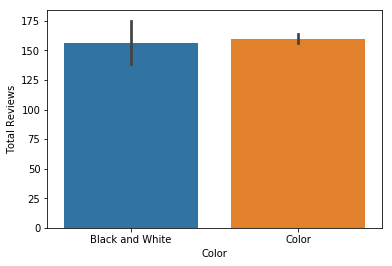

In [31]:
sns.barplot(data=df_IMDd, x=df_IMDd["Color"], y=df_IMDd["Total Reviews"])

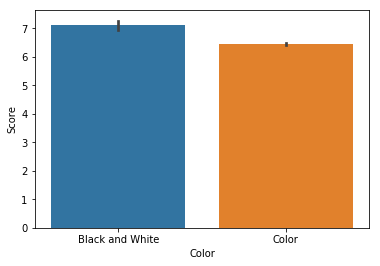

In [32]:
sns.barplot(data=df_IMDd, x=df_IMDd["Color"], y=df_IMDd["Score"])

In [33]:
#The Most Reviews (Color Movies)
#The Most Score (B&W Movies)

------

# Bivariate
> Make at least one chart
,write your observation under every chart

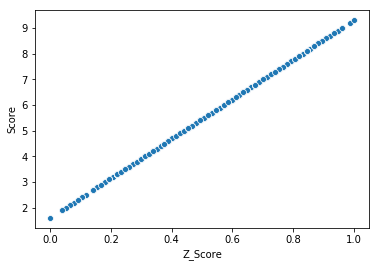

In [34]:
sns.scatterplot(data=df_IMDd, x=df_IMDd["Z_Score"], y=df_IMDd["Score"])

In [35]:
#As We See There Is Positive Correlation Between Z_Score And Score (Fit Line)---> linear

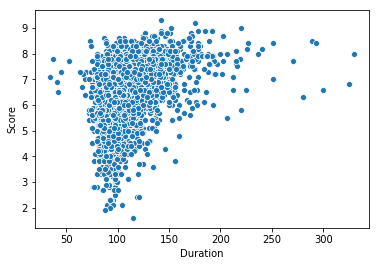

In [36]:
sns.scatterplot(data=df_IMDd, x=df_IMDd["Duration"], y=df_IMDd["Score"])

In [37]:
#As We See There Is No Correlation In This Chart

----


# Multivariate
> Make at least one chart
,write your observation under every chart

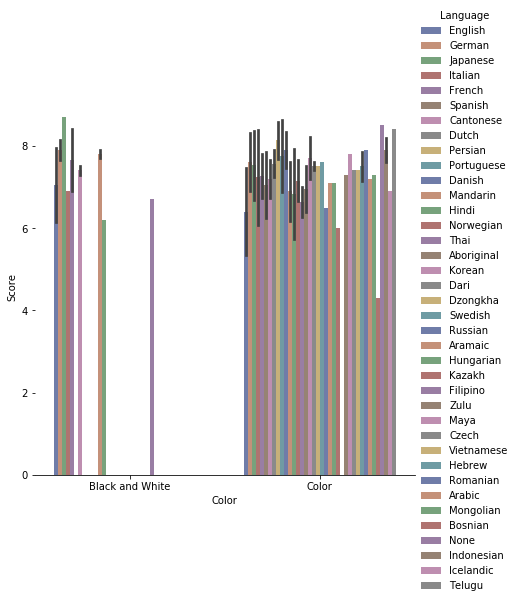

In [38]:
g = sns.catplot(
    data=df_IMDd, kind="bar",
    x="Color", y="Score", hue="Language",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)

In [39]:
#As We See Most Of Language Create Color Movies Unlike B%W

In [40]:
#There Are Many Missing Value And It Will Cause Problem In Visulization With Tableau So I Will Clean It 

In [41]:
df_IMDd.isna().sum()

Title                   0
Release Date            0
Color                   0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
Score                   0
Total Reviews           1
Duration                1
Gross Revenue           0
Budget                  0
Z_Score                 0
Softmax_Score           0
dtype: int64

In [42]:
#In Column Rating I Will Replace Missing Value With Not Rating
df_IMDd["Rating"].fillna("Not Rated", inplace=True)

In [43]:
df_IMDd.isnull().sum()
#Done

Title                  0
Release Date           0
Color                  0
Genre                  0
Language               2
Country                0
Rating                 0
Lead Actor             3
Director Name          0
Lead Actor FB Likes    3
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
Score                  0
Total Reviews          1
Duration               1
Gross Revenue          0
Budget                 0
Z_Score                0
Softmax_Score          0
dtype: int64

In [44]:
#I Will Replace Missing Value With Mean In Column Lead Actor FB Likes
val = df_IMDd["Lead Actor FB Likes"].mean()
df_IMDd["Lead Actor FB Likes"].fillna(val, inplace=True)

In [45]:
df_IMDd.isnull().sum()
#Done

Title                  0
Release Date           0
Color                  0
Genre                  0
Language               2
Country                0
Rating                 0
Lead Actor             3
Director Name          0
Lead Actor FB Likes    0
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
Score                  0
Total Reviews          1
Duration               1
Gross Revenue          0
Budget                 0
Z_Score                0
Softmax_Score          0
dtype: int64

In [46]:
#I Will Replace Missing Value With Mean In Column Total Reviews
val1 = df_IMDd["Total Reviews"].mean()
df_IMDd["Total Reviews"].fillna(val1, inplace=True)

In [47]:
df_IMDd.isnull().sum()
#Done

Title                  0
Release Date           0
Color                  0
Genre                  0
Language               2
Country                0
Rating                 0
Lead Actor             3
Director Name          0
Lead Actor FB Likes    0
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
Score                  0
Total Reviews          0
Duration               1
Gross Revenue          0
Budget                 0
Z_Score                0
Softmax_Score          0
dtype: int64

In [48]:
#I Will Replace Missing Value With Mean In Column Duration
val2 = df_IMDd["Duration"].mean()
df_IMDd["Duration"].fillna(val2, inplace=True)

In [49]:
df_IMDd.isnull().sum()
#Done

Title                  0
Release Date           0
Color                  0
Genre                  0
Language               2
Country                0
Rating                 0
Lead Actor             3
Director Name          0
Lead Actor FB Likes    0
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
Score                  0
Total Reviews          0
Duration               0
Gross Revenue          0
Budget                 0
Z_Score                0
Softmax_Score          0
dtype: int64

In [50]:
#There Is Missing Value In 2 Category Columns So I Will Drop It
df_IMDd.dropna(axis=0, inplace=True)

In [51]:
df_IMDd.isnull().sum()
#Done

Title                  0
Release Date           0
Color                  0
Genre                  0
Language               0
Country                0
Rating                 0
Lead Actor             0
Director Name          0
Lead Actor FB Likes    0
Cast FB Likes          0
Director FB Likes      0
Movie FB Likes         0
Score                  0
Total Reviews          0
Duration               0
Gross Revenue          0
Budget                 0
Z_Score                0
Softmax_Score          0
dtype: int64

In [52]:
#Now My Dataset Has No Missing Value So Lets Make Visulization In Tableau ;)

In [53]:
#I Will Save This Data To Visilization With Tableau
df_IMDd.to_csv("Movies_Data.csv")

In [54]:
#Final It Is My Account On Tableau Public Please See My DashBord 
#-----> https://public.tableau.com/profile/mo.dy#!/?newProfile=&activeTab=0

----

# SUMMERY
 



>here write your summery about dataset
>> Our Data View The Movies Rating By Many Column Like Score , Reviews , Actors ,And Directors / 
>> We Can Tell That The Most Actor Famous As He Has Many Of Movies Is Robert De Niro / /
>> The Most Movie Has Great Score Is The ShawShank Redemption / 
>> The Most Movie Has Great Reviews Is The Dark Knight Rises / 
>> There Are Strong Correlation Between Score And Z_Score Because We Create Z_Score From Score / 
>> Color Movies Have Most Reviews But B&W Movies Have Most Score / 
>> Many Of Country Create Color Movies Today / 
>> There is No Correlation Between The Columns / 
>> The Most Director Is Steven Spielberg He Is Product Many Movies / 
>> Our Data Have 59 Missing Value In Some Columns But It Have Not Row With No Any Values All Rows Missing One Value Or Two / 
>> Robert De Niro Act In 41 Movies / 
>> Comedy Movies Is 1016 movies / 
>> Steven Spielberg Product 24 Movies / 

>List at least three insights.

1. Dataset Have Category And Countative Data . 
2. Dataset Have Some Missing Values In Some Columns Not All Columns .
3. Dataset Have Unique Values In Column Title .
4. Dataset Do Not Need To Cleaning But It Need To Drop Missing Values .
5. Dataset Have Not Duplicate Values .



# Useful references

* [Python Guide](https://docs.python.org/3/tutorial/index.html)  
[Python Guide](https://www.w3schools.com/python/)
* [Data Cleaning Guide](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
* [Pandas Guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Matplotlib Examples](https://matplotlib.org/gallery/index.html)

* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)

